In [2]:
import requests
import urllib3
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [3]:
# download vaccine data
url_vaccines = 'https://data.ontario.ca/dataset/752ce2b7-c15a-4965-a3dc-397bf405e7cc/resource/8a89caa9-511c-4568-af89-7f2174b4378c/download/accine_doses.csv'
r = requests.get(url_vaccines, allow_redirects=True)
open('data/vaccine_data_recent.csv', 'wb').write(r.content)

url_outbreaks = "https://data.ontario.ca/dataset/5472ffc1-88e2-48ca-bc9f-4aa249c1298d/resource/66d15cce-bfee-4f91-9e6e-0ea79ec52b3d/download/ongoing_outbreaks.csv"
r = requests.get(url_outbreaks, allow_redirects=True)
open('data/outbreaks_updated.csv', 'wb').write(r.content)


162067

In [11]:
url = 'https://data.ontario.ca/api/3/action/datastore_search?resource_id=66d15cce-bfee-4f91-9e6e-0ea79ec52b3d&limit=5'  
fileobj = urllib3.urlopen(url)
print fileobj.read()

SyntaxError: invalid syntax (<ipython-input-11-54746ec54956>, line 3)

In [ ]:
outbreaks_df = pd.read_csv("data/outbreaks_updated.csv")
outbreaks_df.head()
outbreaks.c

In [6]:
vaccines_df = pd.read_csv("data/vaccine_data_recent.csv")
vaccines_df.head()
vaccines_df['total_doses_administered'] = vaccines_df['total_doses_administered'].str.replace(r',', '')
vaccines_df['total_doses_administered'] = vaccines_df['total_doses_administered'].astype('int32')
vaccines_df.dtypes

report_date                                     object
previous_day_doses_administered                 object
total_doses_administered                         int32
total_doses_in_fully_vaccinated_individuals     object
total_individuals_fully_vaccinated              object
dtype: object

2020-12-24
38


([<matplotlib.axis.YTick at 0x262d6023f98>,
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

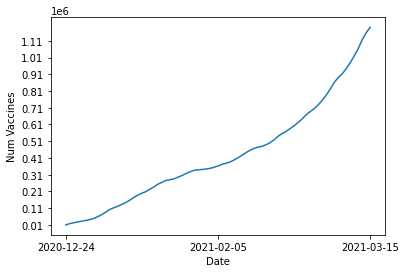

In [79]:
# print(vaccines_df['report_date'])
vaccines_fig, vaccines_plt = plt.subplots()
vaccines_plt.plot(vaccines_df['report_date'], vaccines_df['total_doses_administered'])
vaccines_plt.set(xlabel='Date',ylabel='Num Vaccines')
print(vaccines_df['report_date'].iloc[0])
print(int(len(vaccines_df['report_date'])/2))
plt.xticks([vaccines_df['report_date'].iloc[0],vaccines_df['report_date'].iloc[int(len(vaccines_df['report_date'])/2)],vaccines_df['report_date'].iloc[-1]])
# plt.yticks(np.arange(vaccines_df['total_doses_administered'].iloc[0],vaccines_df['total_doses_administered'].iloc[-1], step=100000))
plt.yticks(np.arange(vaccines_df['total_doses_administered'].iloc[0],vaccines_df['total_doses_administered'].iloc[-1], step=100000))